---
title: "Lab 2 - Eldridge"
format:
  html:
    theme: darkly
---

In [2]:
import plotnine as p9
import pandas as pd

df = pd.read_csv('avocado-updated-2020.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33045 entries, 0 to 33044
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           33045 non-null  object 
 1   average_price  33045 non-null  float64
 2   total_volume   33045 non-null  float64
 3   4046           33045 non-null  float64
 4   4225           33045 non-null  float64
 5   4770           33045 non-null  float64
 6   total_bags     33045 non-null  float64
 7   small_bags     33045 non-null  float64
 8   large_bags     33045 non-null  float64
 9   xlarge_bags    33045 non-null  float64
 10  type           33045 non-null  object 
 11  year           33045 non-null  int64  
 12  geography      33045 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 3.3+ MB


In [3]:
def classify_region(geo):
    if geo == "Total U.S.":
        return 'National'
    elif geo in ["West", "Northeast", "South Central", "Southeast", "Great Lakes", "Plains", "California", "Midsouth"]:
        return 'Regional'
    elif geo in ["California", "Texas", "New York", "Florida", "South Carolina", "Washington"]:  
        return 'State'
    else:
        return 'Metro'
df['region_type'] = df['geography'].apply(classify_region)

df.rename(columns={
    '4046': 'small_hass_bags',
    '4225': 'large_hass_bags',
    '4770': 'xlarge_hass_bags'
}, inplace=True)

distinct_regions = df['geography'].nunique()
print(f"There are {distinct_regions} distinct geographical regions.")

print(df[['geography', 'region_type']].drop_duplicates())

df.to_csv('clean_avocado.csv', index=False)

There are 54 distinct geographical regions.
                geography region_type
0                  Albany       Metro
2                 Atlanta       Metro
4    Baltimore/Washington       Metro
6                   Boise       Metro
8                  Boston       Metro
10      Buffalo/Rochester       Metro
12             California    Regional
14              Charlotte       Metro
16                Chicago       Metro
18      Cincinnati/Dayton       Metro
20               Columbus       Metro
22       Dallas/Ft. Worth       Metro
24                 Denver       Metro
26                Detroit       Metro
28           Grand Rapids       Metro
30            Great Lakes    Regional
32    Harrisburg/Scranton       Metro
34   Hartford/Springfield       Metro
36                Houston       Metro
38           Indianapolis       Metro
40           Jacksonville       Metro
42              Las Vegas       Metro
44            Los Angeles       Metro
46             Louisville       Metro
48   M

In [4]:
clean_avo = pd.read_csv('clean_avocado.csv')
print(len(clean_avo))
clean_avo

33045


,date,average_price,total_volume,small_hass_bags,large_hass_bags,xlarge_hass_bags,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,region_type
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,Metro
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany,Metro
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta,Metro
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta,Metro
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington,Metro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.,National
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West,Regional
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West,Regional
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico,Metro


In [5]:
#3. Which major geographical region sold the most total organic, small Hass avocados in 2017?
organic2017 = clean_avo[(clean_avo['year'] == 2017) & (clean_avo['type'] == 'organic') & (clean_avo['geography'] != 'Total U.S.')]

region_sales = organic2017.groupby('geography')['small_hass_bags'].sum().reset_index()

most_sales_region = region_sales.loc[region_sales['small_hass_bags'].idxmax()]

print(f"The region with the most total organic small Hass avocados sold in 2017 is: {most_sales_region['geography']}")
print(f"Total small Hass bags sold: {most_sales_region['small_hass_bags']}")


The region with the most total organic small Hass avocados sold in 2017 is: West
Total small Hass bags sold: 1870206.29


In [6]:
clean_avo['date'] = pd.to_datetime(clean_avo['date'])

clean_avo['month'] = clean_avo['date'].dt.month
clean_avo['day'] = clean_avo['date'].dt.day
clean_avo['year'] = clean_avo['date'].dt.year

monthly_avg_volume = clean_avo.groupby('month')['total_volume'].mean().reset_index()

highest_avg_volume_month = monthly_avg_volume.loc[monthly_avg_volume['total_volume'].idxmax()]

month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
highest_month_name = month_names[highest_avg_volume_month['month']]

print(f"The month with the highest average volume of avocado sales is: {highest_month_name}")


The month with the highest average volume of avocado sales is: May


/var/folders/jb/g1z659_j7g7g3c677k1x2bsc0000gn/T/ipykernel_1528/1401883970.py:26: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


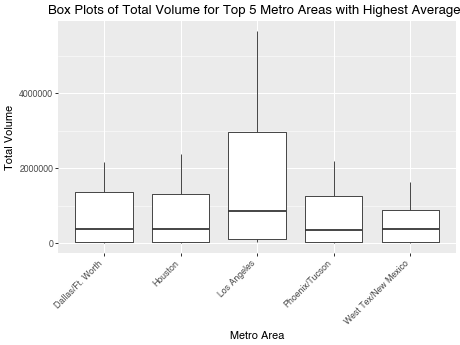

In [7]:
#5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.
import pandas as pd
from plotnine import ggplot, aes, geom_boxplot, labs, theme, element_text

only_metro = clean_avo[clean_avo['region_type'] == 'Metro']

metro_area = only_metro.groupby('geography')['total_volume'].sum().reset_index()

top_5_metro = metro_area.sort_values(by='total_volume', ascending=False).head(5)

top_5_names = top_5_metro['geography'].tolist()

top_5_data = only_metro[only_metro['geography'].isin(top_5_names)]

metro_most = (
    ggplot(top_5_data, aes(x='geography', y='total_volume')) +
    geom_boxplot() +
    labs(
        title='Box Plots of Total Volume for Top 5 Metro Areas with Highest Averages',
        x='Metro Area',
        y='Total Volume'
    ) +
    theme(axis_text_x=element_text(rotation=45, ha='right'))
)

print(metro_most)


In [9]:
#6. From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.
california_regions = ["Los Angeles", "San Diego", "Sacramento", "San Francisco"]
california_data = clean_avo[clean_avo['geography'].isin(california_regions)]

california_data

,date,average_price,total_volume,small_hass_bags,large_hass_bags,xlarge_hass_bags,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,region_type,month,day
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,Metro,1,4
45,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,Metro,1,4
80,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento,Metro,1,4
81,2015-01-04,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento,Metro,1,4
82,2015-01-04,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego,Metro,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33018,2020-11-29,1.43,23531.38,3303.69,2057.03,0.00,18170.66,18144.54,26.12,0.00,organic,2020,Sacramento,Metro,11,29
33019,2020-11-29,1.12,469356.72,104509.99,19988.45,7210.47,337647.81,189341.36,127701.64,20604.81,conventional,2020,San Diego,Metro,11,29
33020,2020-11-29,1.95,25799.95,894.63,838.11,0.00,24067.21,9691.46,14375.75,0.00,organic,2020,San Diego,Metro,11,29
33021,2020-11-29,1.50,644141.37,128555.43,136718.24,5597.21,373270.49,159276.65,207760.32,6233.52,conventional,2020,San Francisco,Metro,11,29


/var/folders/jb/g1z659_j7g7g3c677k1x2bsc0000gn/T/ipykernel_1528/913425488.py:24: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


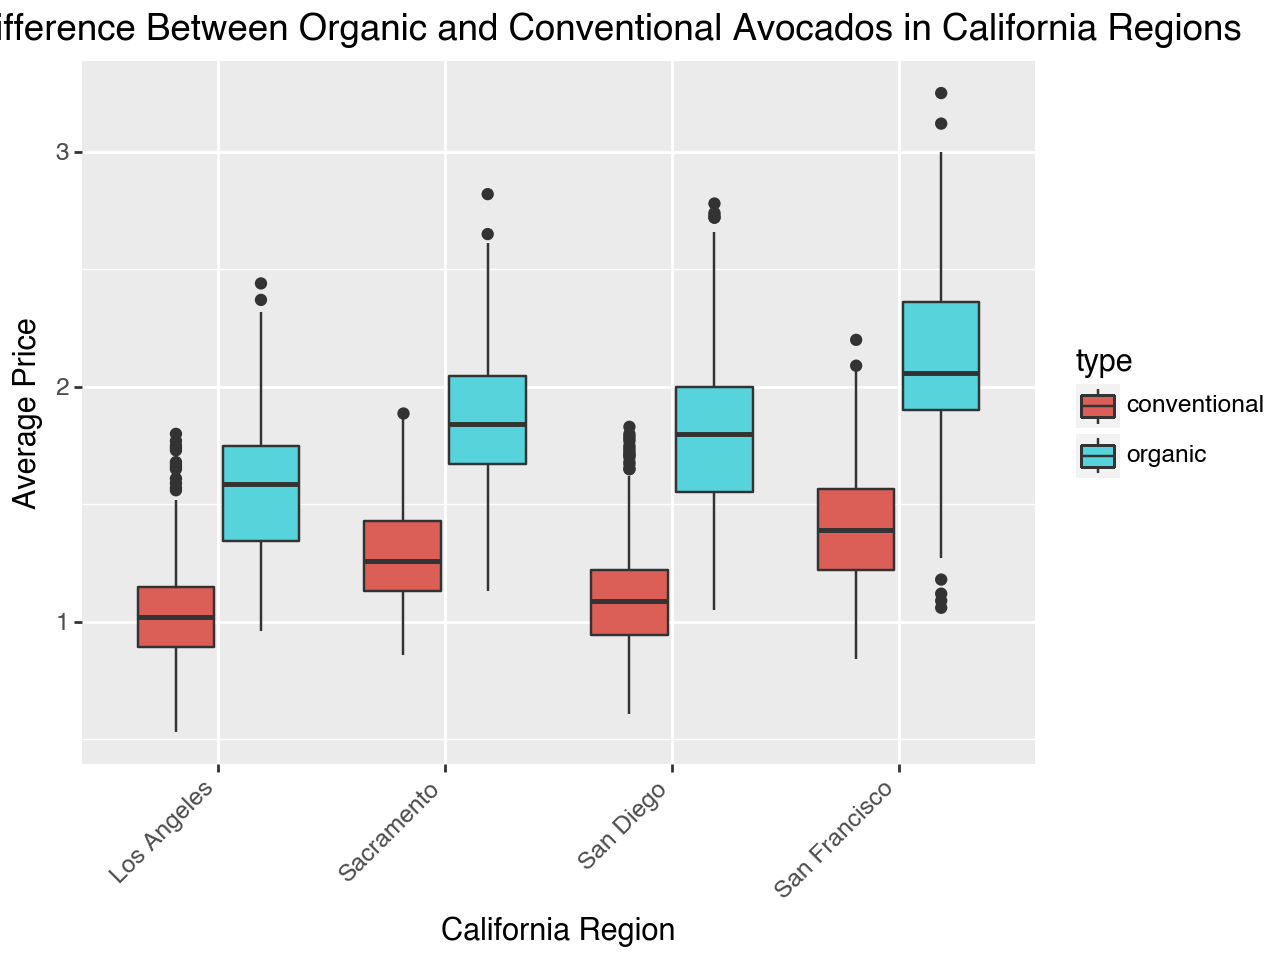

In [10]:
#7. In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.
price_difference = (
    california_data.groupby(['geography', 'type'])['average_price']
    .mean()
    .unstack()
    .reset_index()
)

price_difference['price_diff'] = price_difference['organic'] - price_difference['conventional']

price_difference

price_dif_plot = (
    ggplot(california_data, aes(x='geography', y='average_price', fill='type')) +
    geom_boxplot() +
    labs(
        title='Price Difference Between Organic and Conventional Avocados in California Regions',
        x='California Region',
        y='Average Price'
    ) +
    theme(axis_text_x=element_text(rotation=45, ha='right'))
)

print(price_dif_plot)


/var/folders/jb/g1z659_j7g7g3c677k1x2bsc0000gn/T/ipykernel_1528/3263463930.py:36: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


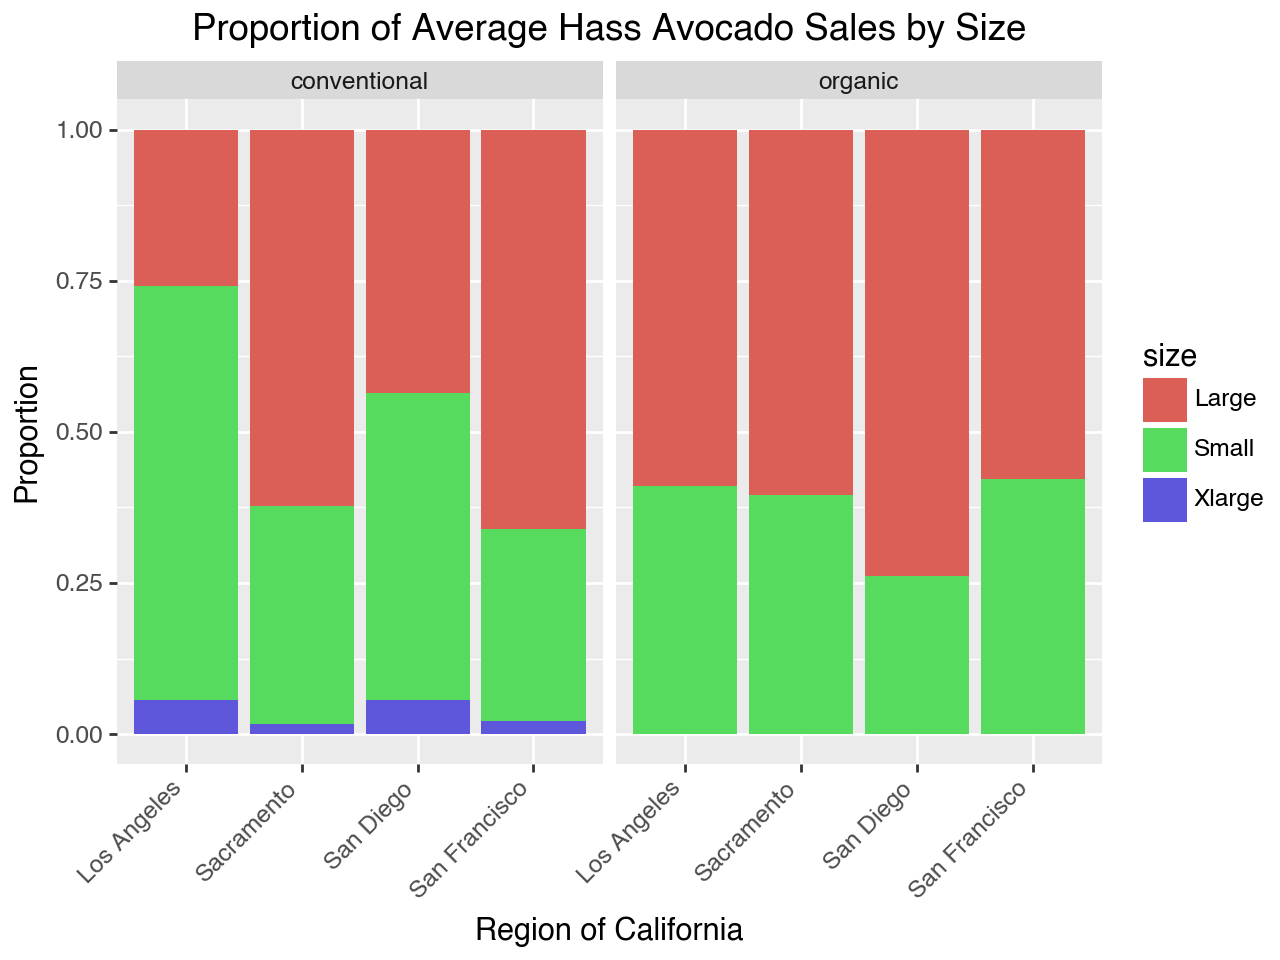

In [14]:
#8. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.
import pandas as pd
from plotnine import ggplot, aes, geom_bar, facet_wrap, labs, theme, element_text, position_fill


#ChatGPT - Melt the DataFrame to convert size columns into rows for easy plotting
california_melted = pd.melt(
    california_data,
    id_vars=['geography', 'type'],
    value_vars=['xlarge_hass_bags', 'large_hass_bags', 'small_hass_bags'],
    var_name='size',
    value_name='volume'
)

california_melted['size'] = california_melted['size'].replace({
    'xlarge_hass_bags': 'Xlarge',
    'large_hass_bags': 'Large',
    'small_hass_bags': 'Small'
})

#ChatGPT - Helped with colors/asethetics
plot = (
    ggplot(california_melted, aes(x='geography', y='volume', fill='size')) +
    geom_bar(stat='identity', position=position_fill()) +
    facet_wrap('~type', scales='free_x') +
    labs(
        title='Proportion of Average Hass Avocado Sales by Size',
        x='Region of California',
        y='Proportion'
    ) +
    theme(
        axis_text_x=element_text(rotation=45, ha='right')
    )
)

print(plot)


In [28]:
new_df = pd.read_csv('Lab2CreateData.csv')

joined_data = pd.merge(california_data, new_df, on='geography', how='inner')

joined_data.rename(columns={'year_x': 'year'}, inplace=True)

joined_data


,date,average_price,total_volume,small_hass_bags,large_hass_bags,xlarge_hass_bags,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,region_type,month,day,year_y,avg_house_price
0,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,Metro,1,4,2015,"800,000"
1,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,Metro,1,4,2016,"820,000"
2,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,Metro,1,4,2017,"833,000"
3,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,Metro,1,4,2018,"850,000"
4,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,Metro,1,4,2019,"870,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14683,2020-11-29,1.87,59527.02,2815.23,4542.30,0.00,52169.49,52034.33,135.16,0.00,organic,2020,San Francisco,Metro,11,29,2016,"1,530,000"
14684,2020-11-29,1.87,59527.02,2815.23,4542.30,0.00,52169.49,52034.33,135.16,0.00,organic,2020,San Francisco,Metro,11,29,2017,"1,555,000"
14685,2020-11-29,1.87,59527.02,2815.23,4542.30,0.00,52169.49,52034.33,135.16,0.00,organic,2020,San Francisco,Metro,11,29,2018,"1,575,000"
14686,2020-11-29,1.87,59527.02,2815.23,4542.30,0.00,52169.49,52034.33,135.16,0.00,organic,2020,San Francisco,Metro,11,29,2019,"1,625,000"


/var/folders/jb/g1z659_j7g7g3c677k1x2bsc0000gn/T/ipykernel_1528/1280855276.py:15: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/Users/evaneldridge/opt/anaconda3/lib/python3.9/site-packages/plotnine/stats/stat_smooth.py:215: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/Users/evaneldridge/opt/anaconda3/lib/python3.9/site-packages/plotnine/stats/stat_smooth.py:215: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/Users/evaneldridge/opt/anaconda3/lib/python3.9/site-packages/plotnine/stats/stat_smooth.py:215: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message

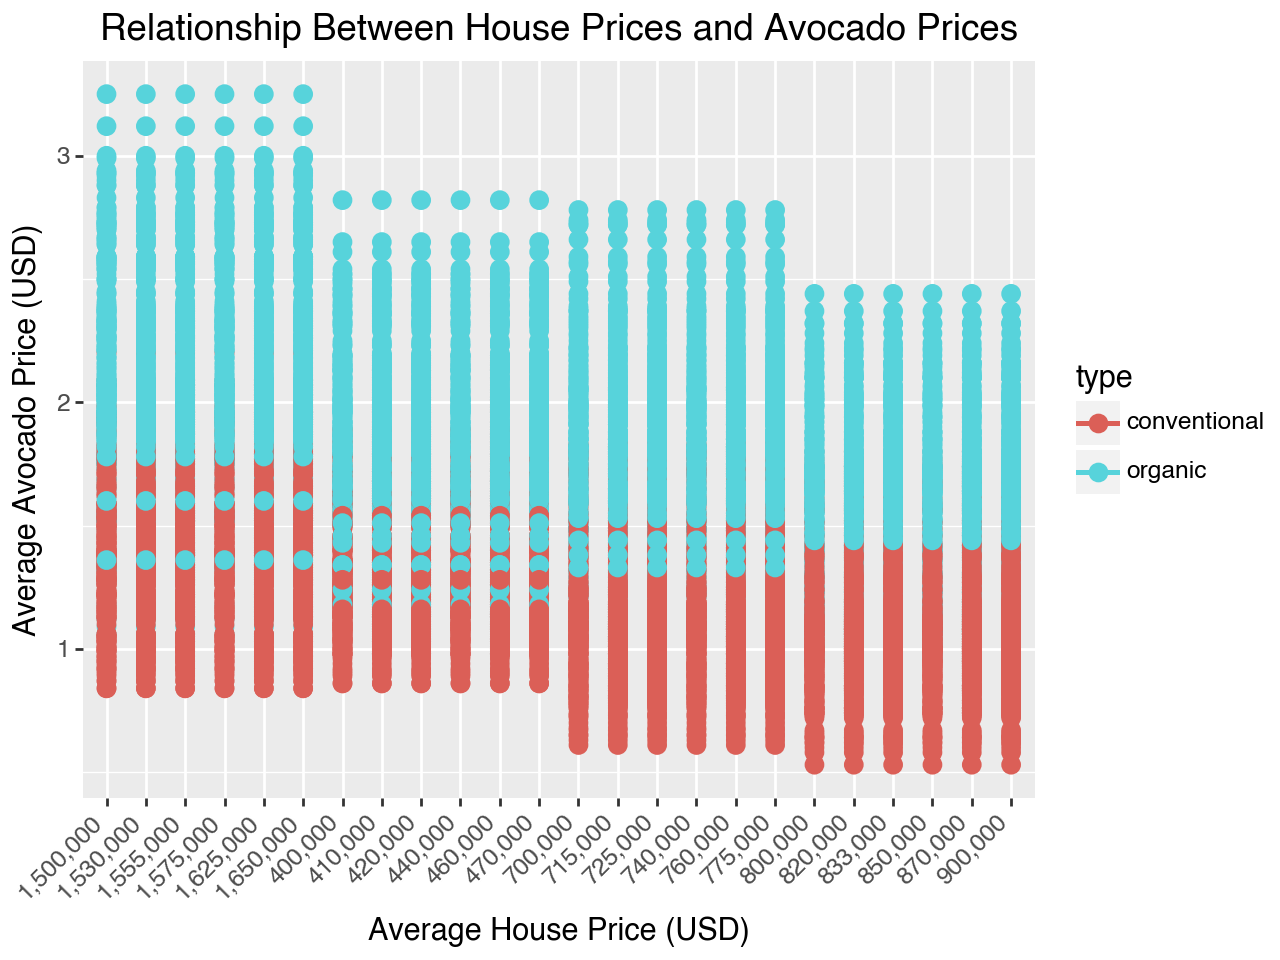

In [30]:
from plotnine import ggplot, aes, geom_point, geom_smooth, labs, theme

price_plot = (
    ggplot(joined_data, aes(x='avg_house_price', y='average_price', color='type')) +
    geom_point(size=3) +
    geom_smooth(method='lm', se=False) +
    labs(
        title='Relationship Between House Prices and Avocado Prices',
        x='Average House Price (USD)',
        y='Average Avocado Price (USD)'
    ) +
    theme(axis_text_x=element_text(rotation=45, ha='right'))
)

print(price_plot)


From the plot, we can see that there is no significant correlation between house prices and avocado prices in California regions from 2015 to 2020. Both organic and conventional avocado prices remain relatively the same across different house price levels, with organic avocados consistently priced higher than conventional ones. This suggests that avocado pricing is not strongly correlated with the housing market, such as regional demand, though furhter analysis would be needed to state that confidently. The plot effectively shows that house prices do not appear to drive changes in avocado prices.





